# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [ ]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2023-02-22 05:23:50--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2023-02-22 05:23:50 (223 MB/s) - ‘train.csv’ saved [29470338/29470338]



## Inspect Data

In [1]:
import pandas as pd
df = pd.read_csv("./train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [ ]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [ ]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
# TODO implement a new column text which contains the lowercased title and lead (concatenated with space)
df["text"] = df["title"] + " " + df["lead"]
df["text"] = df["text"].apply(lambda x: x.lower())
df['text'].head()

0    wall st. bears claw back into the black (reute...
1    carlyle looks toward commercial aerospace (reu...
2    oil and economy cloud stocks' outlook (reuters...
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to all-time record, posing new...
Name: text, dtype: object

In [ ]:
# TODO print the number of documents for each label
df['label'].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

In [ ]:
# TODO create a new column with the number of non-stop words in each text

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

en_stop_words = stopwords.words('english')

def count_non_stop_word(text):
  count = 0
  words = word_tokenize(text)
  for w in words:
    if w not in en_stop_words:
      count += 1
  return count

df['n_stop_words'] = df['text'].apply(count_non_stop_word)
df['n_stop_words'].groupby(df["label"]).mean()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


label
business    33.409867
sci/tech    31.777200
sport       30.611833
world       31.975733
Name: n_stop_words, dtype: float64

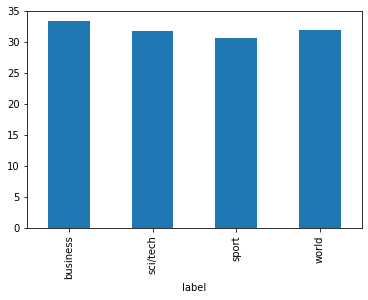

In [ ]:
# TODO plot the average number of non-stop words per label 
df['n_stop_words'].groupby(df["label"]).mean().plot(kind='bar', x='label')

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") appear in the different classes in our data

In [ ]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern for keyword
    x = r"(\b){}[a-z]*".format(keyword)
    pattern = re.compile(x)
    def count_keyword_frequencies(text):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(re.findall(pattern, text))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print ("keyword:", keyword, ", count: {}".format(df["text"].apply(count_keyword_frequencies).sum()))
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        counts = df[df["label"] == label]["text"].apply(count_keyword_frequencies).sum()
        #TODO print how often the keyword appears in this class
        print ("label:", label,", keyword:", keyword, "count: {}".format(counts))
    print("="*100)

keyword: play , count: 7670
label: business , keyword: play count: 321
label: sci/tech , keyword: play count: 1541
label: sport , keyword: play count: 5480
label: world , keyword: play count: 328
keyword: tax , count: 1537
label: business , keyword: tax count: 1185
label: sci/tech , keyword: tax count: 93
label: sport , keyword: tax count: 31
label: world , keyword: tax count: 228
keyword: blackberry , count: 234
label: business , keyword: blackberry count: 44
label: sci/tech , keyword: blackberry count: 190
label: sport , keyword: blackberry count: 0
label: world , keyword: blackberry count: 0
keyword: israel , count: 3572
label: business , keyword: israel count: 25
label: sci/tech , keyword: israel count: 65
label: sport , keyword: israel count: 66
label: world , keyword: israel count: 3416


As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

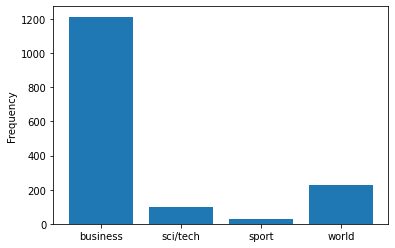

In [ ]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(r"tax.*?\b")

def count_keyword_frequencies(text):
    num_occurrences = len(re.findall(pattern, text))
    return num_occurrences
df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset

plt.bar(list(range(1,5)), df["counts"].groupby(df["label"]).sum())
plt.xticks(ticks=[1, 2, 3, 4], labels = df['label'].unique())
plt.ylabel('Frequency')
plt.show()

In [1]:
import os

os.system('jupyter nbconvert --to html homework_01-sol.ipynb')

65280